## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

Firstly data is neded to be understood for wine quality. By the study of data, it needs to be decided that which ingridiants are affecting the wine quaity most. Then deciding the ingridiants affecting the wine quality most, a new or filtered datafarame can be created and then it can be fitted on the machine learning models.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

We need data that provides accurate amount of ingridients used in making of wine, and the data of produced wine quality associated with ingridients used to make it. We will require non null and scaled data to predict best quality wine. 

### Data Collection

**Q3. From where do we get our data?**

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

Red vinho verde wine samples, from the north of Portugal.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Knowing the amount of each variable to produce differnt quality of wine will lead to a clear understanding of which ingridiants will affect wine quality for producers. Knowing this producer can accurately produce different qualities of wine for different markets. Knowing the promising results from the producers, distributers can find perfect market areas for differnt qualities of wines to be sold and get the best profit out of it. Ultimately it will lead to overall profit growth and customer satisfaction. 

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
wine.shape

(1599, 12)

In [46]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [48]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [49]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

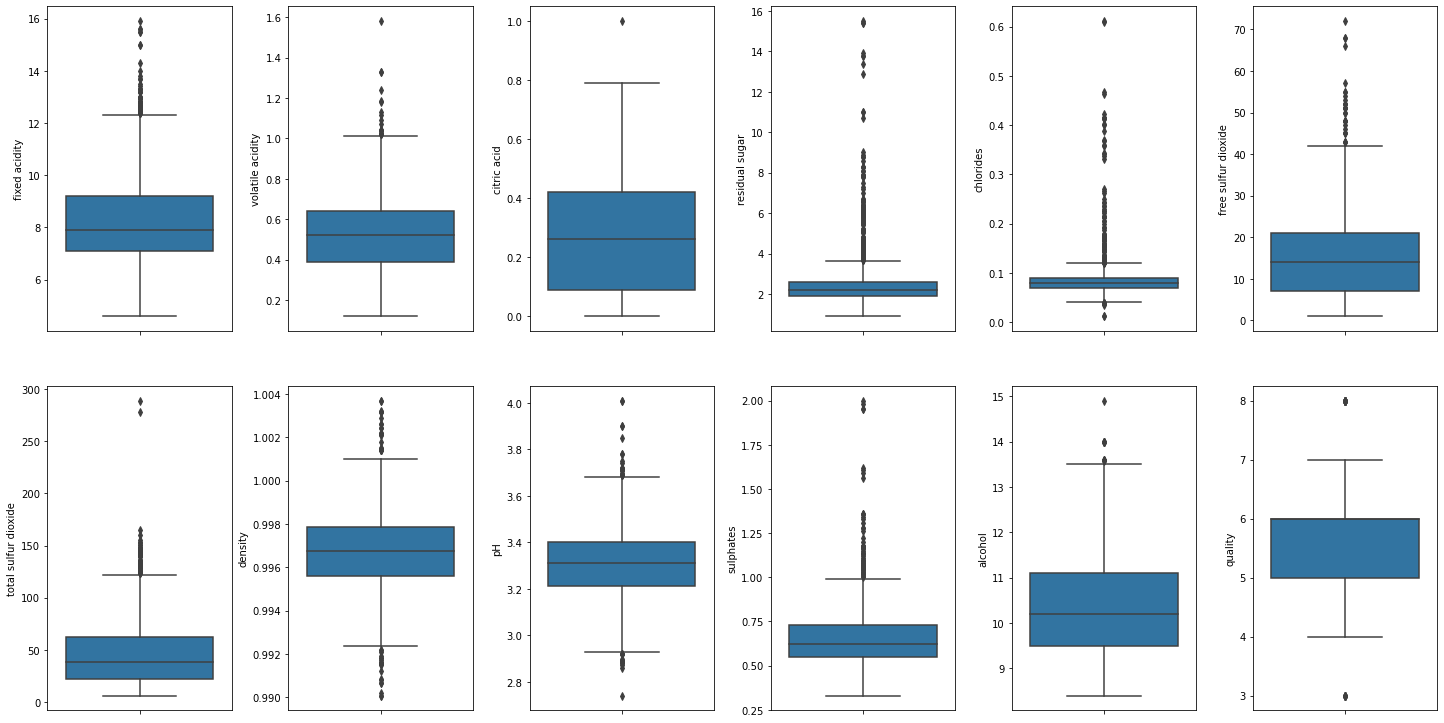

In [50]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
    if col != 'type':
        sns.boxplot(y=col, data=wine, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

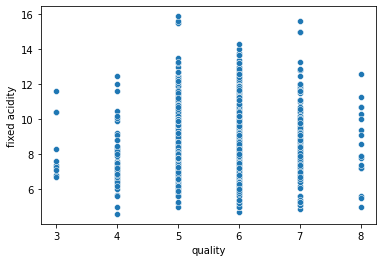

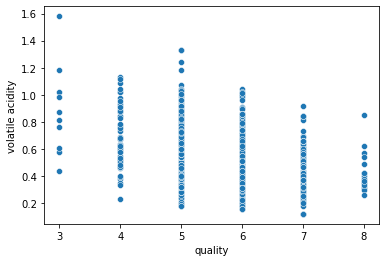

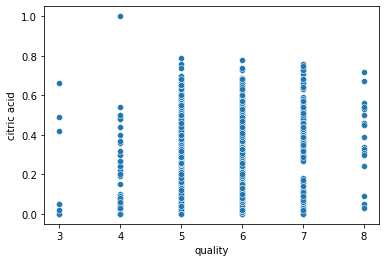

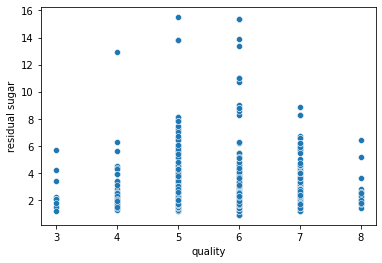

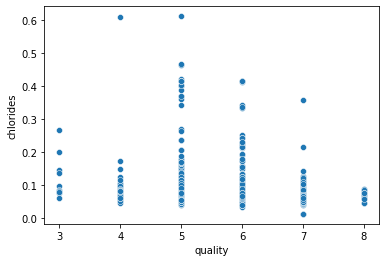

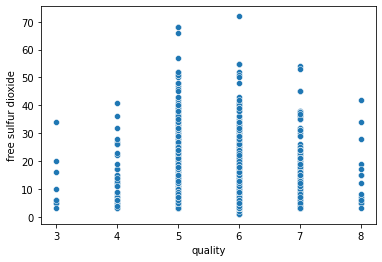

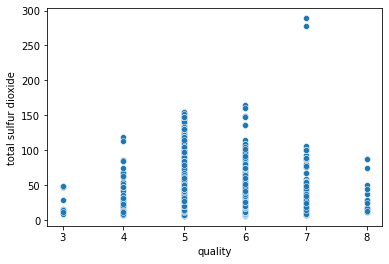

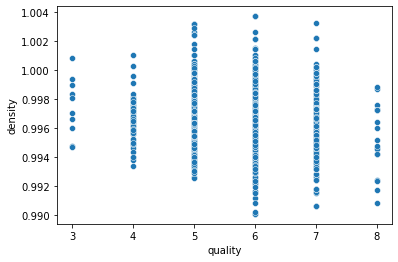

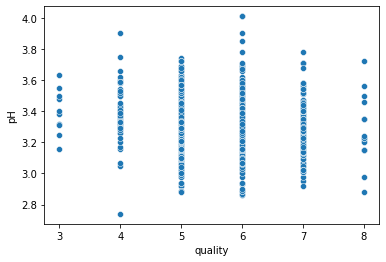

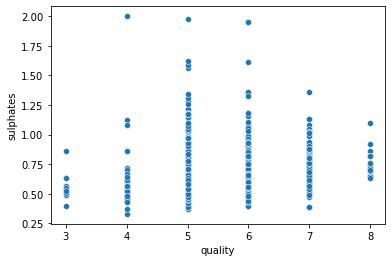

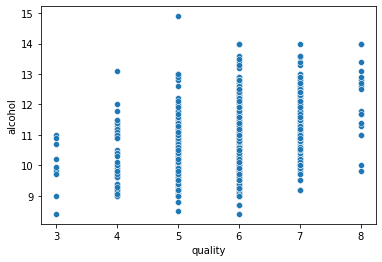

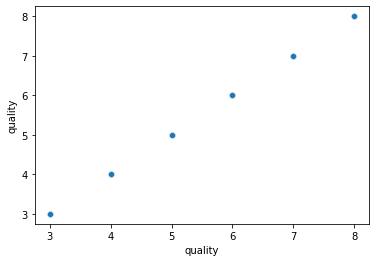

In [51]:
for i, col in enumerate(wine.columns):
    plt.figure(i)
    sns.scatterplot(data=wine, x='quality', y=col)

There are outliers seen, but they are not much. Given the size and distribution of database, it may not affect the performence very much by removing outliers.

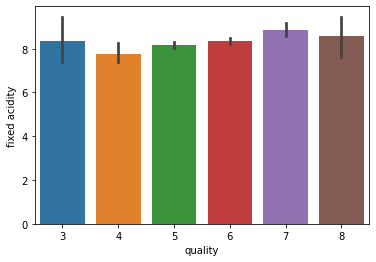

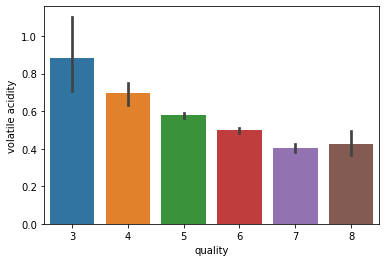

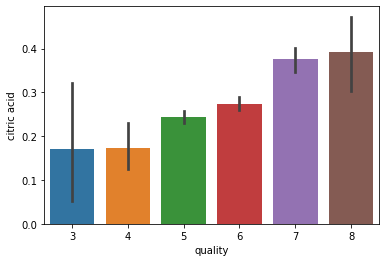

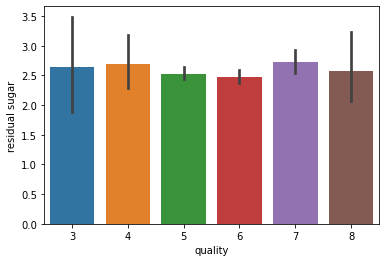

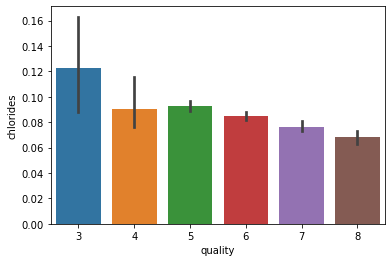

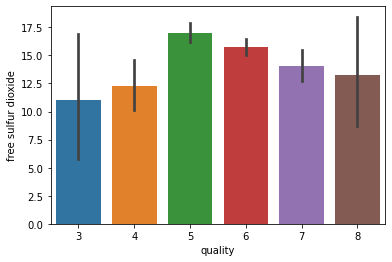

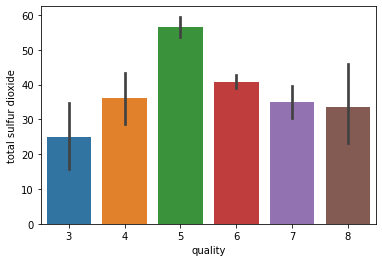

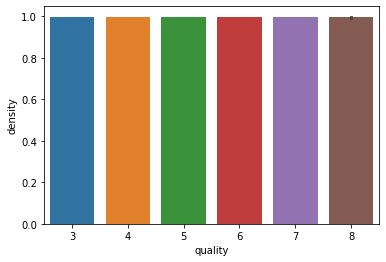

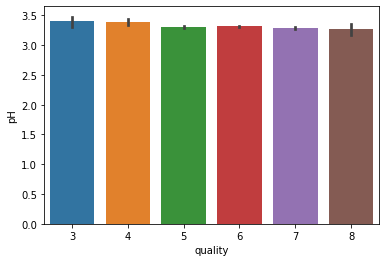

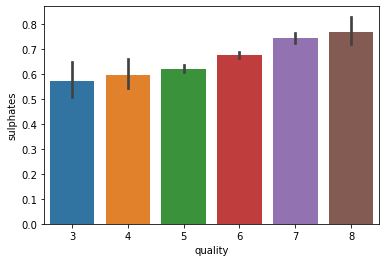

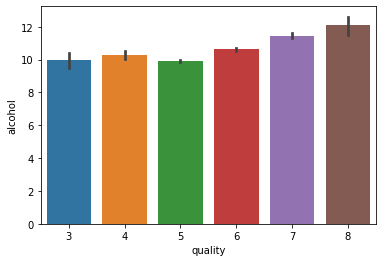

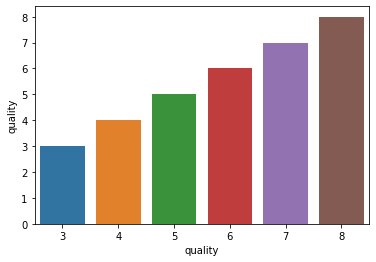

In [52]:

for i, col in enumerate(wine.columns):
    plt.figure(i)
    sns.barplot(x='quality', y=col, data=wine)

Three different patterns can be observed. First, there are **positive** relationships between **quality and critic acid, alcohol, and sulphates**. Second, there are **negative** relationships between **quality and volatile acidity, density, and pH**. Last, these independent variables show no significant relationship with quality: residual sugar, chlorides, and total sulfur dioxide.

<AxesSubplot:>

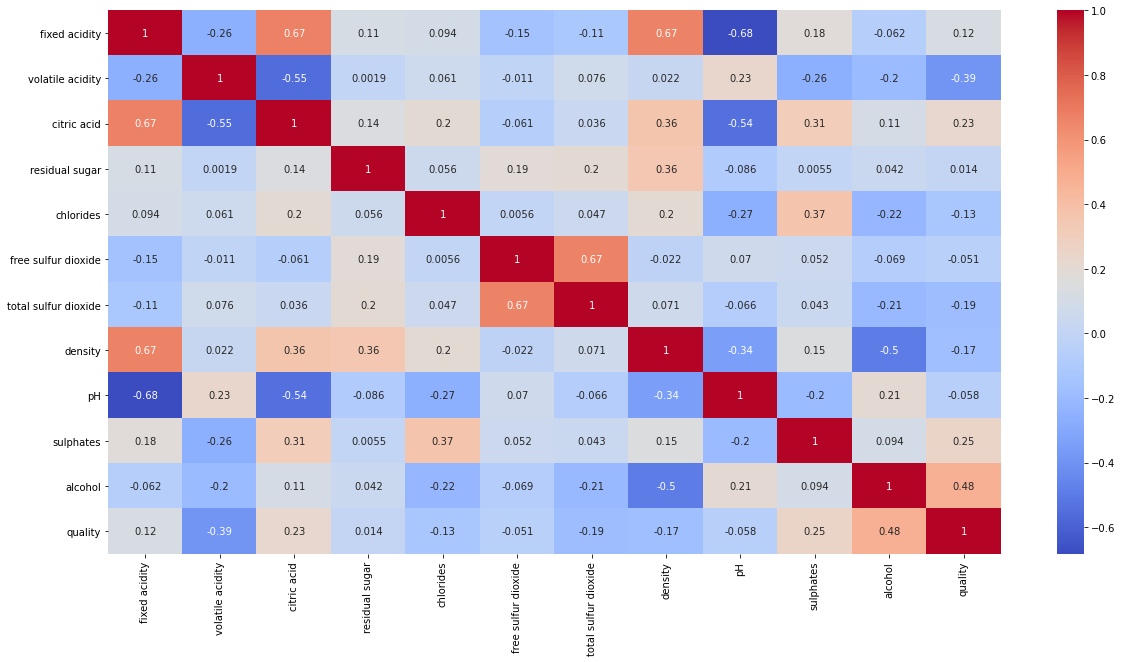

In [53]:
corr = wine.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='quality', ylabel='count'>

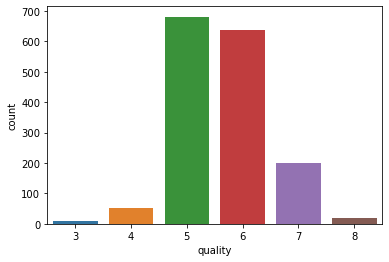

In [54]:
sns.countplot(wine['quality'])

### Simplifying target variable 

In [55]:
wine['quality'] = wine['quality'].apply(lambda x: 1 if x>6 else 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [56]:
x=wine.drop(['quality'], axis=1)
y=wine['quality']

In [57]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [58]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

### Splittiong the data

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

x_train.shape


(1279, 11)

### Scalling the data

As we observed, the variables in the data are not scaled. 

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

### Implementing Ridge and Lasso Regression models

In [61]:
from sklearn.linear_model import Ridge, Lasso
rd = Ridge()

rd.fit(x_train_sc,y_train)


Ridge()

In [62]:
ls = Lasso()

ls.fit(x_train_sc,y_train)


Lasso()

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

### R-squared

**For Ridge Regression**

In [63]:
from sklearn.metrics import r2_score

score=r2_score(y_test, rd.predict(x_test_sc))
print(score)

0.2616978696899728


**For Lasso Regression**

In [64]:
score1=r2_score(y_test, ls.predict(x_test_sc))
print(score1)

-0.0015549873279634419


### MAE (Mean absolute error)

**For Ridge Regression**

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, rd.predict(x_test_sc))

0.20955922122124485

**For Lasso Regression**

In [66]:
mean_absolute_error(y_test, ls.predict(x_test_sc))

0.24074716575449573

### RMSE (Root Mean Squared Error) 

**For Ridge Regression**

In [67]:
np.sqrt(np.mean((y_test - rd.predict(x_test_sc)) ** 2))

0.3041566631240124

**For Lasso Regression**

In [68]:
np.sqrt(np.mean((y_test - ls.predict(x_test_sc)) ** 2))

0.35425637402750154

By evaluating R-squared, MAE and RMSE for both Ridge and Lasso regression model it can be seen that, both Ridge and Lasso regression models are performing poorly.

### Feature importance scores for the top features

In [69]:
correlation = wine.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

Here, top 3 important features that help predicting wine quality are **alcohol, citric acid, and sulphates**

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

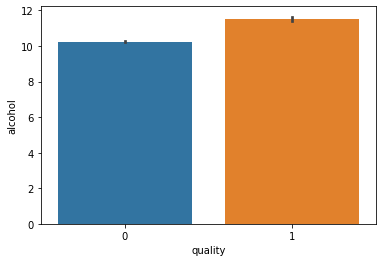

In [70]:
 sns.barplot(x='quality', y='alcohol', data=wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

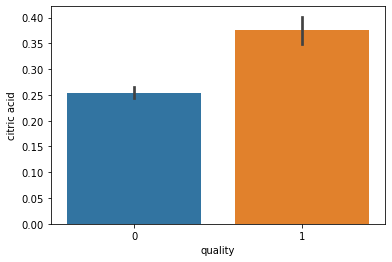

In [71]:
 sns.barplot(x='quality', y='citric acid', data=wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

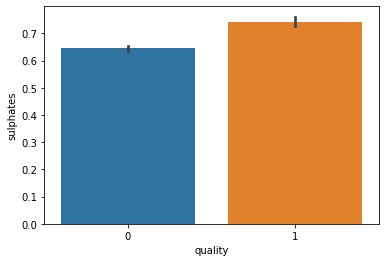

In [72]:
 sns.barplot(x='quality', y='sulphates', data=wine)

### Conclusion

Ridge and Lasso regression models are not ideal to predict wine quality.